In [27]:
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

### LightGBM

In [28]:
df_train = pd.read_csv('../data/train_con_features_encoded.csv', index_col='Unnamed: 0')
df_test = pd.read_csv('../data/test_con_features_encoded.csv', index_col='Unnamed: 0')
display(df_train.head())

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,...,cantidad_palabras_descripcion,relacion_palabras_descripcion,es_avenida,es_ciudad_capital,ciudad_turistica_top15,anio,mes,tipodepropiedad_cb,ciudad_cb,provincia_cb
0,254099,8.116114,2.0,1.0,2.0,80.0,80.0,0.0,0.0,0.0,...,0,0.000000,1,0,0,2015,8,2.763765e+06,3.384582e+06,3.471689e+06
1,53461,10.000000,3.0,2.0,2.0,268.0,180.0,0.0,0.0,0.0,...,1,0.007968,1,0,0,2013,6,2.898908e+06,4.604780e+06,3.471689e+06
2,247984,5.000000,3.0,2.0,2.0,144.0,166.0,0.0,0.0,0.0,...,10,0.046957,0,0,0,2015,10,2.398159e+06,8.890818e+05,2.367701e+06
3,209067,1.000000,2.0,1.0,1.0,63.0,67.0,0.0,0.0,0.0,...,0,0.000000,0,0,0,2012,3,2.398159e+06,1.479134e+06,2.762459e+06
4,185997,10.000000,2.0,1.0,1.0,95.0,95.0,0.0,0.0,0.0,...,1,0.074108,0,0,0,2016,6,2.763765e+06,2.749654e+06,2.367701e+06


In [29]:
feature_cols = df_train.columns.tolist()
feature_cols.remove('precio')

X = df_train[feature_cols]
y = df_train['precio']

feature_cols

['id',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'cantidad_amenities',
 'cantidad_servicios',
 'relacion_metros',
 'metros_por_habitacion',
 'metros_por_bano',
 'metros_por_amenities',
 'bano_por_habitacion',
 'garages_por_habitacion',
 'precio_prom_ciudad',
 'precio_prom_propiedad',
 'provincia_top5',
 'seguridad_descripcion',
 'moderno_descripcion',
 'hermoso_descripcion',
 'estado_descripcion',
 'seguridad_titulo',
 'moderno_titulo',
 'hermoso_titulo',
 'estado_titulo',
 'cantidad_palabras_descripcion',
 'relacion_palabras_descripcion',
 'es_avenida',
 'es_ciudad_capital',
 'ciudad_turistica_top15',
 'anio',
 'mes',
 'tipodepropiedad_cb',
 'ciudad_cb',
 'provincia_cb']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(180000, 41) (180000,)
(60000, 41) (60000,)


In [31]:
import lightgbm as lgb
from sklearn import metrics

'''clf = lgb.LGBMRegressor()

#ajustar
gridParams = {
    'learning_rate': [0.05],
    'num_leaves': [90,200],
    'boosting_type' : ['gbdt'],
    'objective' : ['regression'],
    'max_depth' : [5,6,7,8],
    'random_state' : [501], 
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'min_split_gain' : [0.01],
    'min_data_in_leaf':[10],
    'metric':['mae']
    }

grid = RandomizedSearchCV(clf,gridParams,verbose=1,cv=10,n_jobs = -1,n_iter=10)
grid.fit(X_train,y_train)

grid.best_params_'''

"clf = lgb.LGBMRegressor()\n\n#ajustar\ngridParams = {\n    'learning_rate': [0.05],\n    'num_leaves': [90,200],\n    'boosting_type' : ['gbdt'],\n    'objective' : ['regression'],\n    'max_depth' : [5,6,7,8],\n    'random_state' : [501], \n    'colsample_bytree' : [0.5,0.7],\n    'subsample' : [0.5,0.7],\n    'min_split_gain' : [0.01],\n    'min_data_in_leaf':[10],\n    'metric':['mae']\n    }\n\ngrid = RandomizedSearchCV(clf,gridParams,verbose=1,cv=10,n_jobs = -1,n_iter=10)\ngrid.fit(X_train,y_train)\n\ngrid.best_params_"

In [32]:
best_params = {
    'learning_rate': 0.03,
    'num_leaves': 256,
    'objective' : 'regression',
    'max_depth' : 12,
    'random_state' : 501, 
    'colsample_bytree' : 0.7,
    'subsample' : 0.7,
    'min_split_gain' : 0.01,
    'min_data_in_leaf':10,
    'metric':['mae']
    }

In [33]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

LightGBM = lgb.train(best_params, lgb_train, num_boost_round=1500, valid_sets=lgb_eval, early_stopping_rounds=10)

[1]	valid_0's l1: 1.58567e+06
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.55025e+06
[3]	valid_0's l1: 1.51703e+06
[4]	valid_0's l1: 1.48392e+06
[5]	valid_0's l1: 1.45257e+06
[6]	valid_0's l1: 1.42275e+06
[7]	valid_0's l1: 1.39368e+06
[8]	valid_0's l1: 1.36499e+06
[9]	valid_0's l1: 1.33754e+06
[10]	valid_0's l1: 1.3109e+06
[11]	valid_0's l1: 1.28552e+06
[12]	valid_0's l1: 1.26134e+06
[13]	valid_0's l1: 1.2375e+06
[14]	valid_0's l1: 1.21549e+06
[15]	valid_0's l1: 1.19353e+06
[16]	valid_0's l1: 1.17231e+06
[17]	valid_0's l1: 1.15215e+06
[18]	valid_0's l1: 1.13281e+06
[19]	valid_0's l1: 1.11407e+06
[20]	valid_0's l1: 1.09598e+06
[21]	valid_0's l1: 1.07909e+06
[22]	valid_0's l1: 1.06243e+06
[23]	valid_0's l1: 1.04614e+06
[24]	valid_0's l1: 1.03062e+06
[25]	valid_0's l1: 1.01576e+06
[26]	valid_0's l1: 1.00164e+06
[27]	valid_0's l1: 987918
[28]	valid_0's l1: 974387
[29]	valid_0's l1: 961333
[30]	valid_0's l1: 949074
[31]	valid_0's l1: 937009
[32]	valid_0's

[304]	valid_0's l1: 585077
[305]	valid_0's l1: 585060
[306]	valid_0's l1: 585017
[307]	valid_0's l1: 584988
[308]	valid_0's l1: 584811
[309]	valid_0's l1: 584762
[310]	valid_0's l1: 584714
[311]	valid_0's l1: 584627
[312]	valid_0's l1: 584485
[313]	valid_0's l1: 584434
[314]	valid_0's l1: 584399
[315]	valid_0's l1: 584250
[316]	valid_0's l1: 584184
[317]	valid_0's l1: 584110
[318]	valid_0's l1: 584047
[319]	valid_0's l1: 583968
[320]	valid_0's l1: 583889
[321]	valid_0's l1: 583732
[322]	valid_0's l1: 583693
[323]	valid_0's l1: 583642
[324]	valid_0's l1: 583604
[325]	valid_0's l1: 583474
[326]	valid_0's l1: 583416
[327]	valid_0's l1: 583313
[328]	valid_0's l1: 583270
[329]	valid_0's l1: 583139
[330]	valid_0's l1: 583043
[331]	valid_0's l1: 583000
[332]	valid_0's l1: 582939
[333]	valid_0's l1: 582886
[334]	valid_0's l1: 582816
[335]	valid_0's l1: 582788
[336]	valid_0's l1: 582729
[337]	valid_0's l1: 582664
[338]	valid_0's l1: 582663
[339]	valid_0's l1: 582609
[340]	valid_0's l1: 582523
[

[610]	valid_0's l1: 573824
[611]	valid_0's l1: 573773
[612]	valid_0's l1: 573763
[613]	valid_0's l1: 573751
[614]	valid_0's l1: 573708
[615]	valid_0's l1: 573669
[616]	valid_0's l1: 573685
[617]	valid_0's l1: 573664
[618]	valid_0's l1: 573628
[619]	valid_0's l1: 573625
[620]	valid_0's l1: 573634
[621]	valid_0's l1: 573635
[622]	valid_0's l1: 573600
[623]	valid_0's l1: 573586
[624]	valid_0's l1: 573579
[625]	valid_0's l1: 573567
[626]	valid_0's l1: 573560
[627]	valid_0's l1: 573560
[628]	valid_0's l1: 573530
[629]	valid_0's l1: 573495
[630]	valid_0's l1: 573499
[631]	valid_0's l1: 573477
[632]	valid_0's l1: 573468
[633]	valid_0's l1: 573454
[634]	valid_0's l1: 573452
[635]	valid_0's l1: 573450
[636]	valid_0's l1: 573467
[637]	valid_0's l1: 573433
[638]	valid_0's l1: 573431
[639]	valid_0's l1: 573405
[640]	valid_0's l1: 573414
[641]	valid_0's l1: 573419
[642]	valid_0's l1: 573407
[643]	valid_0's l1: 573398
[644]	valid_0's l1: 573387
[645]	valid_0's l1: 573378
[646]	valid_0's l1: 573372
[

[920]	valid_0's l1: 570428
[921]	valid_0's l1: 570404
[922]	valid_0's l1: 570382
[923]	valid_0's l1: 570366
[924]	valid_0's l1: 570368
[925]	valid_0's l1: 570345
[926]	valid_0's l1: 570337
[927]	valid_0's l1: 570316
[928]	valid_0's l1: 570312
[929]	valid_0's l1: 570297
[930]	valid_0's l1: 570288
[931]	valid_0's l1: 570291
[932]	valid_0's l1: 570275
[933]	valid_0's l1: 570256
[934]	valid_0's l1: 570243
[935]	valid_0's l1: 570240
[936]	valid_0's l1: 570242
[937]	valid_0's l1: 570246
[938]	valid_0's l1: 570244
[939]	valid_0's l1: 570235
[940]	valid_0's l1: 570226
[941]	valid_0's l1: 570210
[942]	valid_0's l1: 570206
[943]	valid_0's l1: 570191
[944]	valid_0's l1: 570166
[945]	valid_0's l1: 570143
[946]	valid_0's l1: 570133
[947]	valid_0's l1: 570129
[948]	valid_0's l1: 570120
[949]	valid_0's l1: 570107
[950]	valid_0's l1: 570106
[951]	valid_0's l1: 570118
[952]	valid_0's l1: 570114
[953]	valid_0's l1: 570121
[954]	valid_0's l1: 570126
[955]	valid_0's l1: 570122
[956]	valid_0's l1: 570109
[

[1216]	valid_0's l1: 568533
[1217]	valid_0's l1: 568534
Early stopping, best iteration is:
[1207]	valid_0's l1: 568519


In [34]:
LightGBM_pred = LightGBM.predict(X_test, num_iteration=LightGBM.best_iteration)

In [35]:
from sklearn.metrics import mean_absolute_error

LightGBM_mae = mean_absolute_error(y_test, LightGBM_pred)
LightGBM_mae_train = mean_absolute_error(y_train, LightGBM.predict(X_train, num_iteration=LightGBM.best_iteration))
print(f"LightGBM (train): {LightGBM_mae_train:.5f}")
print(f"LightGBM: {LightGBM_mae:.5f}")
print("------------------------------")

LightGBM (train): 393942.46921
LightGBM: 568518.75474
------------------------------


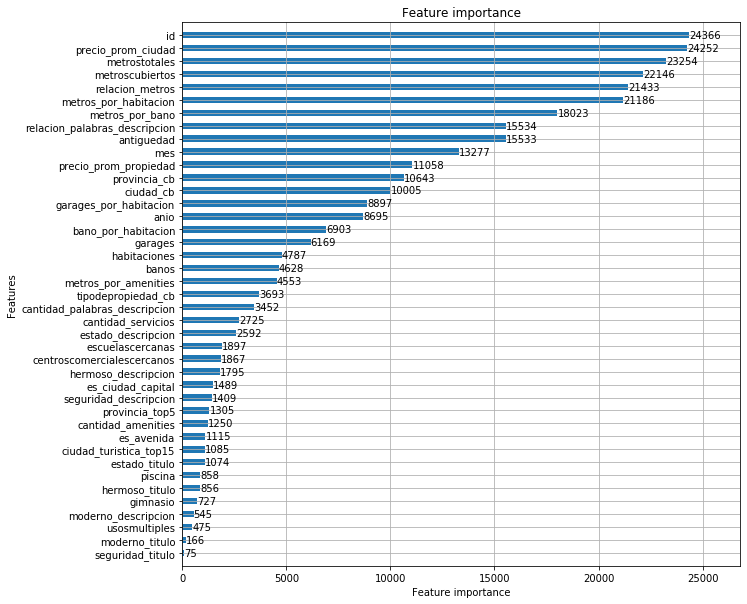

In [36]:
ax = lgb.plot_importance(LightGBM, height=0.5)
fig = ax.figure
fig.set_size_inches(10, 10)

In [37]:
LightGBM_pred_submit = LightGBM.predict(df_test, num_iteration=LightGBM.best_iteration)

In [38]:
resultado_submit = pd.DataFrame(index=df_test.index)
resultado_submit['id'] = df_test['id']
resultado_submit['target'] = LightGBM_pred_submit
display(resultado_submit.head())
resultado_submit.to_csv('../data/submitLightGBM.csv',index=False)

,id,target
0,4941,7.062873e+06
1,51775,1.036621e+06
2,115253,2.242938e+06
3,299321,1.286775e+06
4,173570,5.866771e+05


#### Score en Kaggle (features => score):
 **1.** ***Usando CatBoost encoded*** y ['id',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'cantidad_amenities',
 'cantidad_servicios',
 'relacion_metros',
 'metros_por_habitacion',
 'metros_por_bano',
 'metros_por_amenities',
 'bano_por_habitacion',
 'garages_por_habitacion',
 'precio_prom_ciudad',
 'precio_prom_propiedad',
 'provincia_top5',
 'seguridad_descripcion',
 'moderno_descripcion',
 'hermoso_descripcion',
 'estado_descripcion',
 'seguridad_titulo',
 'moderno_titulo',
 'hermoso_titulo',
 'estado_titulo',
 'cantidad_palabras_descripcion',
 'relacion_palabras_descripcion',
 'es_avenida',
 'es_ciudad_capital',
 'ciudad_turistica_top15',
 'anio',
 'mes',
 'tipodepropiedad_cb',
 'ciudad_cb',
 'provincia_cb']=> ***573846.94092*** con 'learning_rate': 0.03,
    'num_leaves': 256,
    'objective' : 'regression',
    'max_depth' : 12,
    'random_state' : 501, 
    'colsample_bytree' : 0.7,
    'subsample' : 0.7,
    'min_split_gain' : 0.01,
    'min_data_in_leaf':10,
***LOCAL MAE: 568518.75474***